# 워드 클라우드 (word cloud)

- 텍스트 데이터를 시각화하여 각 단어의 빈도(or 중요도)에 따라 단어의 크기를 다르게 표현하는 기법

1. 텍스트 전처리
2. 단어 빈도 계산
3. 단어 크기 결정
4. 단어 배치
5. 시각화

In [ ]:
# !pip install wordcloud

In [ ]:
# !conda install fonts-nanum

### 데이터 준비

In [ ]:
!pip install gdown

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=13Rs5KQiFFIM047i0qLS86_GZvoVnmrRk'
output = 'sms_spam.csv'

gdown.download(url, output)

### 텍스트 전처리

In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
spam_df = pd.read_csv('./sms_spam.csv')
spam_df.head()

In [ ]:
corpus = spam_df['CN'][0]
corpus

In [ ]:
okt = Okt()
nouns = okt.nouns(corpus)
nouns

In [ ]:
word_count = Counter(nouns)
word_count

In [ ]:
ko_stopwords = ['은', '는', '이', '가', '및', '더', '수']
word_count = {word: count for word, count in word_count.items() if word not in ko_stopwords}
word_count

### WordCloud 객체 생성

In [ ]:
wordcloud = WordCloud(
    width=800,
    height=800,
    font_path='C:\\Windows\\Fonts\\H2GTRE.TTF',
    background_color='white'
).generate_from_frequencies(word_count)
wordcloud

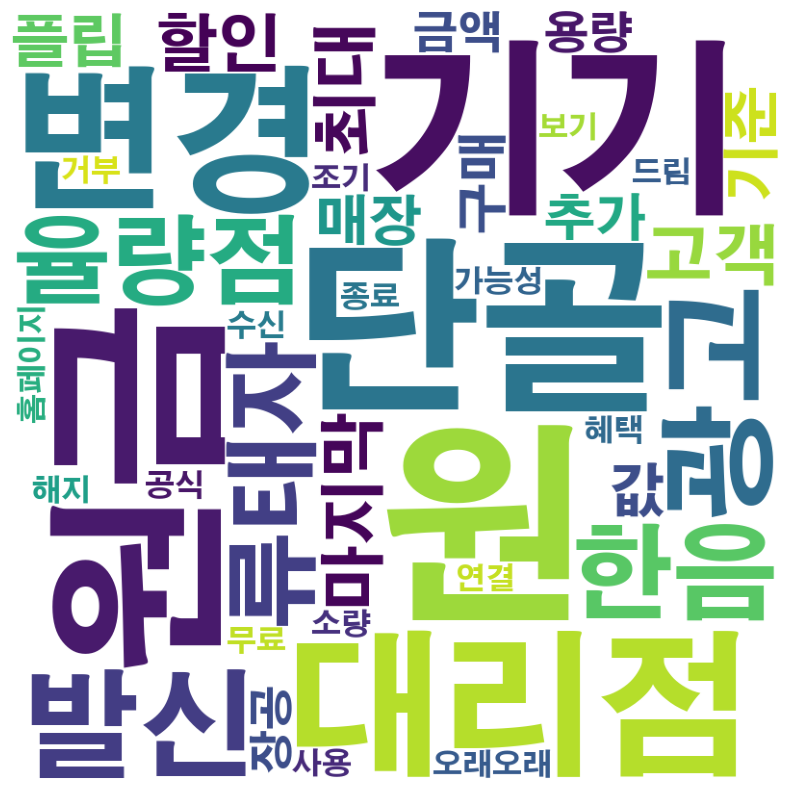

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 전처리 없이 WordCloud

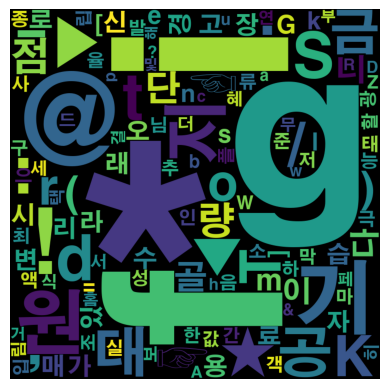

In [18]:
text = spam_df['CN'][0]

word_count = Counter(text)

wordcloud = WordCloud(
    width=800,
    height=800,
    font_path='C:\\Windows\\Fonts\\H2GTRE.TTF'
).generate_from_frequencies(word_count)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 전체 corpus로 WordCloud 그리기!

In [19]:
corpus = spam_df['CN']
corpus.info()

<class 'pandas.core.series.Series'>
RangeIndex: 29588 entries, 0 to 29587
Series name: CN
Non-Null Count  Dtype 
--------------  ----- 
29588 non-null  object
dtypes: object(1)
memory usage: 231.3+ KB


In [20]:
okt = Okt()
nouns = []
for corpus_temp in corpus:
    nouns.extend(okt.nouns(corpus_temp))
nouns

['발신',
 '광고',
 '한음',
 '대리점',
 '율량점',
 '류태자',
 '단골',
 '고객',
 '마지막',
 '최대',
 '할인',
 '기기',
 '변경',
 '기기',
 '변경',
 '플립',
 '원금',
 '기준',
 '기기',
 '값',
 '원',
 '원금',
 '원',
 '매장',
 '추가',
 '원금',
 '원',
 '구매',
 '금액',
 '원',
 '용량',
 '장공',
 '오래오래',
 '사용',
 '수',
 '소량',
 '조기',
 '종료',
 '가능성',
 '단골',
 '더',
 '드림',
 '혜택',
 '보기',
 '공식',
 '대리점',
 '홈페이지',
 '연결',
 '무료',
 '수신',
 '거부',
 '및',
 '단골',
 '해지',
 '발신',
 '광고',
 '전자랜드',
 '동점',
 '최은순',
 '고객',
 '전자랜드',
 '월',
 '전국동시',
 '일',
 '기간',
 '토',
 '월',
 '가전제품',
 '배달',
 '전자랜드',
 '배민',
 '스토어',
 '바로',
 '배달',
 '혼수',
 '가전',
 '견적',
 '꼭',
 '한번',
 '곳',
 '에어컨',
 '추천',
 '전문가',
 '에어컨',
 '만',
 '냉장고',
 '건조기',
 '등',
 '개',
 '품목',
 '전국동시',
 '일',
 '선풍기',
 '인치',
 '원',
 '건조기',
 '삼성',
 '만',
 '냉장고',
 '만',
 '인치',
 '만',
 '삼성',
 '인치',
 '만',
 '아이폰',
 '미니',
 '갤럭시',
 '학생',
 '폰',
 '추천',
 '원',
 '만원',
 '모바일',
 '행사',
 '내용',
 '보기',
 '갤럭시',
 '원',
 '갤럭시',
 '만원',
 '갤럭시',
 '울트라',
 '만원',
 '갤럭시',
 '플립',
 '만원',
 '아이폰',
 '미니',
 '원',
 '아이폰',
 '원',
 '아이폰',
 '원',
 '아이폰',
 '프로',
 '만원',
 '개월',
 '약정',
 '통신',
 '사별'

In [21]:
word_count = Counter(nouns)

ko_stopwords = ['은', '는', '이', '가', '및', '더', '수']
word_count = {word: count for word, count in word_count.items()
              if word not in ko_stopwords}

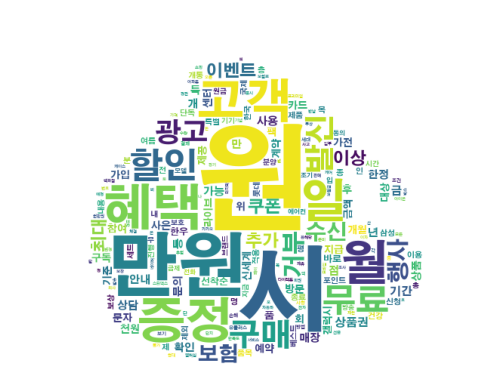

In [26]:
from PIL import Image

wordcloud = WordCloud(
    width=800,
    height=600,
    font_path='C:\\Windows\\Fonts\\H2GTRE.TTF',
    background_color='white',
    mask=np.array(Image.open('C:\\encore_sk-net-fam_9\\lecture_source\\nlp\\02_preprocessing\\dotori2.jpg'))
).generate_from_frequencies(word_count)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()